CMD: [121.0 130.0 122.1 117.0 109.0 128.0 120.24 137.0 135.0 133.0 135.0 142.0
 110.0 127.0 141.0 143.42 145.0 143.0 135.0 146.0 132.0 131.0 134.0 129.0
 126.0 130.0 132.0 130.0 130.0 133.0 130.0 130.0 135.0 134.0 131.0 137.24
 136.0 132.0 134.0 133.0 132.0 134.0 138.0]
mean: 131.698
std: 7.866


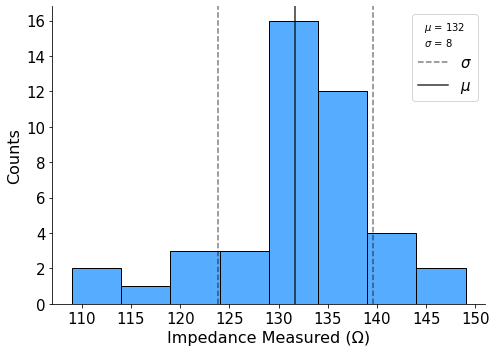

In [5]:
from re import L
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

excel = pd.read_excel (r'/Users/caleb/CMS/Tracker/e-links/eLink_Instrumentation/JupyterScripts/VNAvt_Data.xlsx')

data1 = excel.to_numpy() #Convert to numpy array

# I want to see the distribution of every cable plotted around the mean of the
# CMD channel for VNA tests
# CMD channel is located in the first column
CMD = data1[:,0]

mean = np.mean(CMD)
std = np.std(CMD)

print("CMD: {0}".format(CMD))
print("mean: {0:.1f}".format(mean))
print("std: {0:.1f}".format(std))

g = sns.displot(
    data = data1,
    x = CMD,
    kind = "hist",
    aspect = 1.4,
    color = "dodgerblue",
    multiple = "stack",
    palette = 'Dark2',
    element = 'bars',
    binwidth = 5,
    legend = False,
    )
g.set_xlabels("Impedance Measured (Ω)", fontsize = 16)
g.set_ylabels("Counts", fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)



g.refline(x = mean + std,color = "k",label= "$\\sigma$",alpha = 0.5)
g.refline(x = mean - std,color = "k",alpha = 0.5)
g.refline(x = mean, color = "k", ls = "-",label = "$\\mu$",alpha = 0.8)

fit_info = [f"$\\mu$ = {mean:.0f}",f"$\\sigma$ = {std:.0f}"]



plt.legend(title="\n".join(fit_info),fontsize=15);